# Ml-Project 2-vehicle price prediction

##### our algorithm will take vehicle details like mileage,engine,type,no.of doors,length,width,height,engine capacity,etc..and our algorithm will predict PRICE of the vehicle.

# step1-load data

In [1]:
import pandas as pd
auto_data = pd.read_csv('auto.txt')
auto_data.head()

,symbolling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# step2-clean data

In [2]:
# you can observe there are some coloumns with values? lets clean these.
import numpy as np
auto_data=auto_data.replace('?',np.nan)
auto_data.head()

,symbolling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
auto_data['price'].describe() #lets see what is the datatype of price coloumn internally 


count       201
unique      186
top       16500
freq          2
Name: price, dtype: object

In [4]:
auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce') #coerce meaning is force
auto_data['price']. describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [5]:
# let us remove unwanted colomns -- which ate not useful.

In [6]:
auto_data = auto_data.drop('normalized-losses',axis=1)
auto_data.head()

,symbolling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
auto_data.columns

Index(['symbolling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [8]:
auto_data['horsepower'].describe()

count     203
unique     59
top        68
freq       19
Name: horsepower, dtype: object

In [9]:
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce') #coerce meaning is force
auto_data['horsepower']. describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [10]:
auto_data['bore'] = pd.to_numeric(auto_data['bore'], errors='coerce') #coerce meaning is force
auto_data['bore']. describe()

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

In [11]:
auto_data['stroke'] = pd.to_numeric(auto_data['stroke'], errors='coerce') #coerce meaning is force
auto_data['stroke']. describe()

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [12]:
auto_data['peak-rpm'] = pd.to_numeric(auto_data['peak-rpm'], errors='coerce') #coerce meaning is force
auto_data['peak-rpm']. describe()

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64

In [13]:
auto_data['num-of-cylinders']

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: num-of-cylinders, Length: 205, dtype: object

cylinders_dict={
    'two':2,
    'three':3,
    'four':4,
    'five':5,
    'six':6,
    'eight':8,
    'twelve':12
}
auto_data['num-of-cylinders'].replace(cylinders_dict,inplace = True)
auto_data['num-of-cylinders'].head()

In [14]:
cylinders_dict={ 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12 } 
auto_data['num-of-cylinders'].replace(cylinders_dict,inplace = True)
auto_data['num-of-cylinders'].head()

C:\Users\Harshi\AppData\Local\Temp\ipykernel_27736\1175381420.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  auto_data['num-of-cylinders'].replace(cylinders_dict,inplace = True)


0    4
1    4
2    6
3    4
4    5
Name: num-of-cylinders, dtype: int64

In [15]:
a = {'1bbl':1, '2bbl':2,
       '4bbl':4, 'idi':5, 'mfi':6,
       'mpfi':7, 'spdi':8, 'spfi':9}
auto_data['fuel-system'].replace(a,inplace = True)
b= {'dohc':1, 'dohcv':2, 'l':3,
       'ohc':4, 'ohcf':5, 'ohcv':6,
       'rotor':7}
auto_data['engine-type'].replace(b,inplace = True)
c = {'front':1, 'rear':2} 
auto_data['engine-location'].replace(c,inplace = True)
d = {'4wd':1, 'fwd':2,'rwd':3}
auto_data['drive-wheels'].replace(d,inplace = True)

e= {'alfa-romero':1, 'audi':2, 'bmw':3,
       'chevrolet':4, 'dodge':5, 'honda':6, 'isuzu':7,
       'jaguar':8, 'mazda':9, 'mercedes-benz':10, 'mercury':11,
       'mitsubishi':12, 'nissan':13, 'peugot':14, 'plymouth':15,
       'porsche':16, 'renault':17, 'saab':18, 'subaru':19,
       'toyota':20, 'volkswagen':21, 'volvo':22,
}   
auto_data['make'].replace(e,inplace = True)
f = {'convertible':1,
       'hardtop':2, 'hatchback':3, 'sedan':4,
           'wagon':5}
auto_data['body-style'].replace(f,inplace = True)
g = {'four':4, 'two':2}
auto_data['num-of-doors'].replace(g,inplace = True)

h = {'std':0, 'turbo':1}
auto_data['aspiration'].replace(h,inplace = True)
auto_data.head(10)

C:\Users\Harshi\AppData\Local\Temp\ipykernel_27736\3691137684.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  auto_data['fuel-system'].replace(a,inplace = True)
C:\Users\Harshi\AppData\Local\Temp\ipykernel_27736\3691137684.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  auto_data['fuel-syste

,symbolling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,1,gas,0,2.0,1,3,1,88.6,168.8,...,130,7,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,1,gas,0,2.0,1,3,1,88.6,168.8,...,130,7,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,1,gas,0,2.0,3,3,1,94.5,171.2,...,152,7,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,2,gas,0,4.0,4,2,1,99.8,176.6,...,109,7,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,2,gas,0,4.0,4,1,1,99.4,176.6,...,136,7,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,2,gas,0,2.0,4,2,1,99.8,177.3,...,136,7,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,2,gas,0,4.0,4,2,1,105.8,192.7,...,136,7,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,2,gas,0,4.0,5,2,1,105.8,192.7,...,136,7,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,2,gas,1,4.0,4,2,1,105.8,192.7,...,131,7,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,2,gas,1,2.0,3,1,1,99.5,178.2,...,131,7,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [16]:
i = {'gas':0, 'diesel':1}
auto_data['fuel-type'].replace(i,inplace = True)
auto_data.head(10)

C:\Users\Harshi\AppData\Local\Temp\ipykernel_27736\4232554595.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  auto_data['fuel-type'].replace(i,inplace = True)
C:\Users\Harshi\AppData\Local\Temp\ipykernel_27736\4232554595.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  auto_data['fuel-type'].

,symbolling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,1,0,0,2.0,1,3,1,88.6,168.8,...,130,7,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,1,0,0,2.0,1,3,1,88.6,168.8,...,130,7,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,1,0,0,2.0,3,3,1,94.5,171.2,...,152,7,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,2,0,0,4.0,4,2,1,99.8,176.6,...,109,7,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,2,0,0,4.0,4,1,1,99.4,176.6,...,136,7,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,2,0,0,2.0,4,2,1,99.8,177.3,...,136,7,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,2,0,0,4.0,4,2,1,105.8,192.7,...,136,7,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,2,0,0,4.0,5,2,1,105.8,192.7,...,136,7,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,2,0,1,4.0,4,2,1,105.8,192.7,...,131,7,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,2,0,1,2.0,3,1,1,99.5,178.2,...,131,7,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [17]:
auto_data.isnull()

,symbolling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
auto_data.isna().sum()

symbolling           0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [19]:
#horsepower
#curb-weight
#peal-rpm
del auto_data['horsepower']
del auto_data['curb-weight']
del auto_data['peak-rpm']
#del auto_data['length']

In [20]:
# lets clean up our data
auto_data = auto_data.dropna()

# step3-train test split

In [21]:
from sklearn.model_selection import train_test_split
#lets feed our data to machine learning model
x = auto_data.drop('price',axis=1)
y = auto_data['price'] 
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state=0)

## step4-let us train the algorithm

In [22]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [23]:
linear_model.score(x_train,y_train)

0.8977925747050542

In [24]:
linear_model.coef_

array([  -667.83607138,   -201.03840036, -11877.75594957,   3267.45664655,
         -341.88511643,   -275.67970494,    534.24818935,  12457.43964247,
          -27.57274928,     13.49191389,    735.2578018 ,    331.25941981,
         -633.39734035,    167.85881525,    149.24314962,    266.08507362,
        -3020.67818985,  -4381.08882035,    866.25626477,   -280.79536587,
          314.52728571])

In [25]:
predictors = x_train.columns #see the weights associated with particular feature.
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

fuel-type           -11877.755950
stroke               -4381.088820
bore                 -3020.678190
symbolling            -667.836071
engine-type           -633.397340
num-of-doors          -341.885116
city-mpg              -280.795366
body-style            -275.679705
make                  -201.038400
wheel-base             -27.572749
length                  13.491914
engine-size            149.243150
num-of-cylinders       167.858815
fuel-system            266.085074
highway-mpg            314.527286
height                 331.259420
drive-wheels           534.248189
width                  735.257802
compression-ratio      866.256265
aspiration            3267.456647
engine-location      12457.439642
dtype: float64


# step5-test the algorithm

In [26]:
#lets predict using linear regression model
y_predict = linear_model.predict(x_test)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Harshi\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


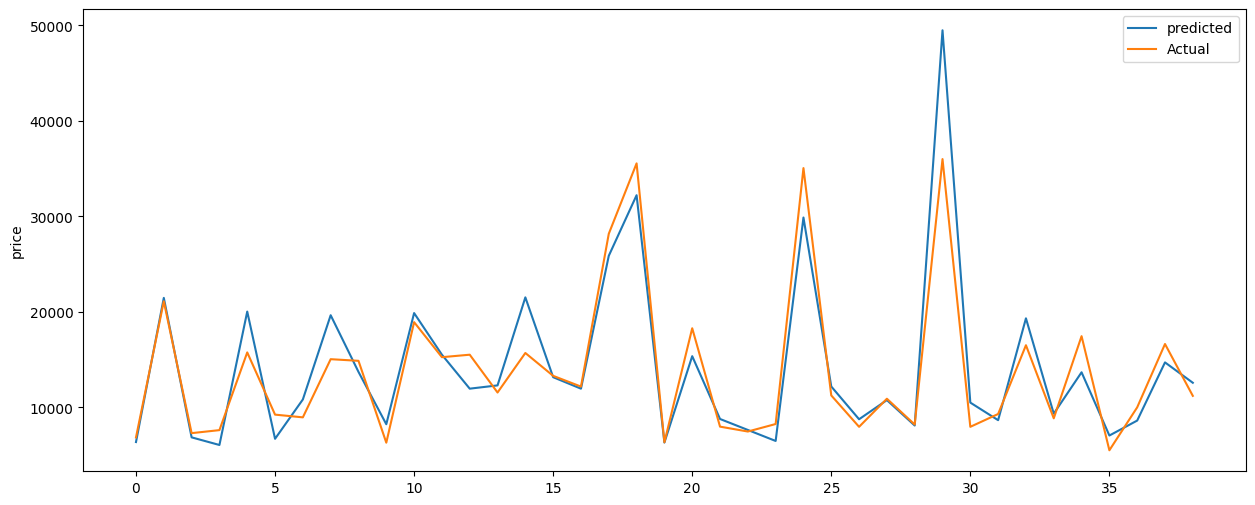

In [27]:
# lets plot the prediction using matplotlib
# In this code we are comparing the actual price and predicted price
%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)
plt.plot(y_predict, label='predicted')
plt.plot(y_test.values, label="Actual")
plt.ylabel('price')
plt.legend()
plt.show()

In [28]:
#how well our regression model works on our test data--->this is our accuracy
score = linear_model.score(x_test,y_test)
score

0.8409940243694668

# step6-find the error(how much is the error in the output)

### MEAN_SQUARED_ERROR...this will tell how much error is there in the given output.

In [29]:
from sklearn.metrics import mean_squared_error
linear_model_mse = mean_squared_error(y_predict,y_test) #predicted y and actual y..
linear_model_mse  #its coming out to be 26 million

9848274.421919564

In [30]:
import math
math.sqrt(linear_model_mse)

3138.196045807139

####  3,138, this is the actual price

## conclusion for linear regression-accuracy is 84% and error is 3,138 dollars

## step7-improvise,let is test other algorithm

In [31]:
#implementing lasso and ridge regression models.
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.5)

lasso_model.fit(x_train, y_train)
#y_pred = lasso_model.predict(x_test)

Lasso(alpha=0.5)

In [32]:
coef = pd.Series(lasso_model.coef_,predictors).sort_values()
print(coef)

fuel-type           -11276.475307
stroke               -4339.482678
bore                 -2900.705799
symbolling            -664.215329
engine-type           -637.747598
num-of-doors          -336.587744
body-style            -280.001734
city-mpg              -278.417707
make                  -200.698903
wheel-base             -28.511348
length                  13.367697
engine-size            147.506614
num-of-cylinders       225.087723
fuel-system            265.510772
highway-mpg            313.267707
height                 331.743139
drive-wheels           542.464925
width                  737.742713
compression-ratio      822.657991
aspiration            3218.009412
engine-location      12438.516845
dtype: float64


In [33]:
coef = pd.Series(lasso_model.coef_,predictors).sort_values()
print(coef)

fuel-type           -11276.475307
stroke               -4339.482678
bore                 -2900.705799
symbolling            -664.215329
engine-type           -637.747598
num-of-doors          -336.587744
body-style            -280.001734
city-mpg              -278.417707
make                  -200.698903
wheel-base             -28.511348
length                  13.367697
engine-size            147.506614
num-of-cylinders       225.087723
fuel-system            265.510772
highway-mpg            313.267707
height                 331.743139
drive-wheels           542.464925
width                  737.742713
compression-ratio      822.657991
aspiration            3218.009412
engine-location      12438.516845
dtype: float64


In [34]:
y_predict = lasso_model.predict(x_test)
score = lasso_model.score(x_test,y_test)
print('accuracy of lasso model is...',score)
lasso_model_mse = mean_squared_error(y_predict, y_test)
print('error of lasso model is...',math.sqrt(lasso_model_mse))



accuracy of lasso model is... 0.8424294881441161
error of lasso model is... 3123.9985295303777


# conclusion for lasso-accuracy is 84% and error is 3123 dollars

In [35]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5)
ridge_model.fit(x_train, y_train)
y_predict = ridge_model.predict(x_test)
score = ridge_model.score(x_test, y_test)
print('accuracy of ridge model is --',score)
ridge_model_mse = mean_squared_error(y_predict, y_test)
print('error of ridge model is..',math.sqrt(ridge_model_mse))

accuracy of ridge model is -- 0.8501346473276976
error of ridge model is.. 3046.6598401154665


## conclusion for ridge algorithm-accuracy is 85% and error is 3046 dollars

## final conclusion-i am recommending ridge algorithm for vehicle price prediction project